<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml02_train_set_test_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  # 클래스
from sklearn.metrics import confusion_matrix, classification_report  # 함수, 속성
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비

Google Drive에 저장된 fish.pickle 파일에서 데이터를 로드.

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/lab_ml/fish.pickle'

In [3]:
with open(file_path, mode='rb') as f:
    fish = pickle.load(f)

In [4]:
type(fish)

dict

In [5]:
fish.keys()

dict_keys(['data', 'target'])

In [7]:
fish_data = fish['data']

In [8]:
fish_data.shape  
# row: 35 bream + 14 smelt
# column: Weigth + Length

(49, 2)

In [9]:
fish_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [10]:
fish_label = fish['target']

In [11]:
fish_label.shape

(49,)

In [12]:
fish_label[:5]

array([1, 1, 1, 1, 1])

# Train/Test 분리, 훈련, 평가

## 순차적인 샘플링

In [13]:
num_train = 35  # 훈련 셋의 샘플 개수

In [16]:
X_train, X_test = fish_data[:num_train], fish_data[num_train:]

In [17]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [18]:
y_train, y_test = fish_label[:num_train], fish_label[num_train:]

In [19]:
y_train.shape, y_test.shape

((35,), (14,))

In [20]:
knn_clf = KNeighborsClassifier()  # kNN 모델 객체 생성

In [21]:
knn_clf.fit(X=X_train, y=y_train)  # 35개 훈련 셋 샘플들로 모델을 학습시킴.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
knn_clf.score(X_train, y_train)  #> 훈련 셋 평가 점수: 1.0(정확도)

1.0

In [23]:
test_predicts = knn_clf.predict(X_test)  # 14개 테스트 셋 샘플들의 예측값을 계산

In [24]:
test_predicts  # 모든 예측값 1(도미, bream)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**샘플링 편향(sampling bias)**: 훈련 셋과 테스트 셋으로 나눌 때, 훈련 셋이 타겟들을 골고루 갖기 못하고, 특정 타겟이 너무 많이 샘플링되는 경우.

In [25]:
y_test  # 테스트 셋의 실제 target(레이블)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
knn_clf.score(X_test, y_test)  #> 테스트 셋의 평가 점수(정확도): 0

0.0

훈련 셋 성능 > 테스트 셋 성능: **과대적합(overfitting)**

## 무작위 샘플링(Random Sampling)

데이터 셋을 무작위로 섞은 후, 훈련/테스트 셋을 분리

In [32]:
idx = [0, 1, 2, 3]
np.random.shuffle(idx)
idx  # 원본 배열 idx에서 아이템들의 순서가 무작위로 섞이게 됨.

[3, 2, 0, 1]

In [33]:
np.random.seed(1)
idx = np.arange(49)  # [0, 1, 2, ..., 48]
np.random.shuffle(idx)
idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25,  6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [34]:
train_idx, test_idx = idx[:num_train], idx[num_train:]

In [35]:
train_idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25])

In [36]:
test_idx

array([ 6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [37]:
X_train, X_test = fish_data[train_idx], fish_data[test_idx]

In [39]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [40]:
y_train, y_test = fish_label[train_idx], fish_label[test_idx]

In [41]:
y_train.shape, y_test.shape

((35,), (14,))

In [42]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [43]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

numpy 배열의 unique한 값의 개수 확인

In [45]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([11, 24]))

In [46]:
11/35, 24/35  # 빙어(smelt)와 도미(bream)의 비율

(0.3142857142857143, 0.6857142857142857)

In [47]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 3, 11]))

In [48]:
3/14, 11/14

(0.21428571428571427, 0.7857142857142857)

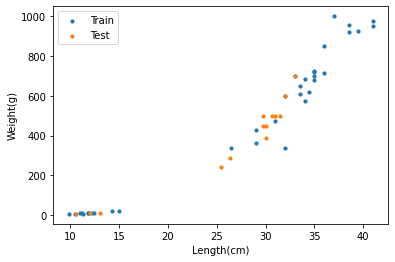

In [55]:
# 훈련 셋/테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train', s=10)
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test', s=10)

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [56]:
knn_clf = KNeighborsClassifier()  # 모델 객체 생성

In [57]:
knn_clf.fit(X_train, y_train)  # 모덱 객체를 훈련 데이터로 학습시킴(fit)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
knn_clf.score(X_train, y_train)  # 훈련 셋의 평가 점수(정확도)

1.0

In [59]:
knn_clf.score(X_test, y_test)  # 테스트 셋의 평가 점수(정확도)

1.0

## 층화 샘플링(Stratified Sampling)

**Stratified Sampling**: 데이터의 타겟의 비율을 훈련/테스트 셋에서도 동일하게 유지하면서 샘플링하는 방법.

In [60]:
# sklearn.model_selection.train_test_split() 함수
X_train, X_test, y_train, y_test = train_test_split(fish_data,  # X_train/X_test로 나뉠 데이터 셋
                                                    fish_label,  # y_train/y_test로 나뉠 타겟
                                                    test_size=0.3,  # 테스트 셋의 비율(0 ~ 1)
                                                    stratify=fish_label,  # stratified sampling 기준이 되는 배열
                                                    random_state=1)  # 난수 seed

In [61]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [62]:
y_train.shape, y_test.shape

((34,), (15,))

In [63]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10, 24]))

In [64]:
10/34, 24/34  # 훈련 셋에서 빙어:도미의 비율

(0.29411764705882354, 0.7058823529411765)

In [65]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 4, 11]))

In [66]:
4/15, 11/15  # 테스트 셋에서 빙어:도미 비율

(0.26666666666666666, 0.7333333333333333)

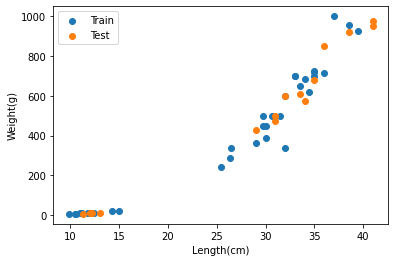

In [68]:
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [70]:
# KNN 모델 생성
knn_clf = KNeighborsClassifier()

In [71]:
# 훈련 셋으로 모델 학습
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
# 훈련 셋 평가
knn_clf.score(X=X_train, y=y_train)

1.0

In [73]:
# 테스트 셋 평가
knn_clf.score(X=X_test, y=y_test)

1.0

In [78]:
test_predicts = knn_clf.predict(X=X_test)

In [79]:
test_predicts

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [80]:
test_predicts == y_test  # 테스트 셋의 예측 결과 == 테스트 셋의 실제값

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [81]:
# 예측값과 실제값을 사용해서 confustion matrix 생성
confusion_matrix(y_true=y_test, y_pred=test_predicts)

array([[ 4,  0],
       [ 0, 11]])

**분류 문제의 성능 지표**

*   정확도(accuracy): 샘플들을 정확하게 분류한 비율.
>   `accurarcy = (TN + TP) / (TN + FP + FN + TP)`

*   정밀도(precision): 양성 예측의 정확도.
양성이라고 예측한 샘플들 중에서 정확하게 예측한 비율.
>   `precision = TP / (FP + TP)`

*   재현율(recall): 실제 양성 샘플들 중에서 정확하게 예측한 비율.
>   `recall = TP / (FN + TP)`

*   F1-score: 정밀도와 재현율의 조화 평균
>   `f1 = 2 / (1/precision + 1/recall)`


In [83]:
clf_report = classification_report(y_true=y_test, y_pred=test_predicts,
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00         4
       Bream       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# 데이터 전처리(Data Preprocessing)

## 데이터 스케일링(Scaling)의 필요성

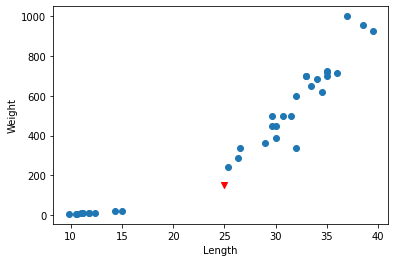

In [85]:
# 가상의 데이터 (150g, 25cm) 생선 시각화
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [86]:
# 훈련시킨 kNN 모델에서 (150g, 25cm) 가상의 생선의 예측값?
test_fish = [[150, 25]]  # (1, 2) shape의 배열
test_pred = knn_clf.predict(X=test_fish)
test_pred
#> 예측 결과: 0 - Smelt(빙어)

array([0])

KNeighborsClassifier 클래스 객체(훈련된 kNN 모델)은 k개의 가장 가까운 이웃을 리턴하는 메서드를 가지고 있음.

In [87]:
distances, neighbor_indices = knn_clf.kneighbors(X=test_fish,
                                                 n_neighbors=5,
                                                 return_distance=True)

In [89]:
distances  #> (1, 5) shape 2d array: 가장 가까운 이웃 5개까지의 거리들

array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        140.00603558]])

In [90]:
neighbor_indices  #> (1, 5) shape 2d array: 가장 가까운 이웃 5개의 인덱스들(훈련 셋에서의 인덱스)

array([[ 0, 18, 33, 26, 30]])

In [93]:
X_train[neighbor_indices[0]]  # fancy(list) indexing

array([[242. ,  25.4],
       [ 19.9,  15. ],
       [ 19.7,  14.3],
       [ 13.4,  12.4],
       [290. ,  26.3]])

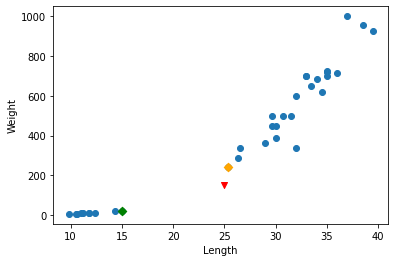

In [92]:
# 가상의 데이터 (150g, 25cm) 생선 시각화
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

# 가장 가까운 이웃
plt.scatter(X_train[0, 1], X_train[0, 0], marker='D', color='orange')
# 두번째 가까운 이웃
plt.scatter(X_train[18, 1], X_train[18, 0], marker='D', color='green')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

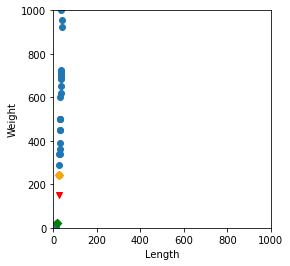

In [95]:
# 가상의 데이터 (150g, 25cm) 생선 시각화
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

# 가장 가까운 이웃
plt.scatter(X_train[0, 1], X_train[0, 0], marker='D', color='orange')
# 두번째 가까운 이웃
plt.scatter(X_train[18, 1], X_train[18, 0], marker='D', color='green')

# x축과 y축을 동일한 scale로
plt.xlim((0, 1_000))
plt.ylim((0, 1_000))
plt.gca().set_aspect('equal')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()